In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import cm


/tmp/ipykernel_1071261/175811547.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', 256)


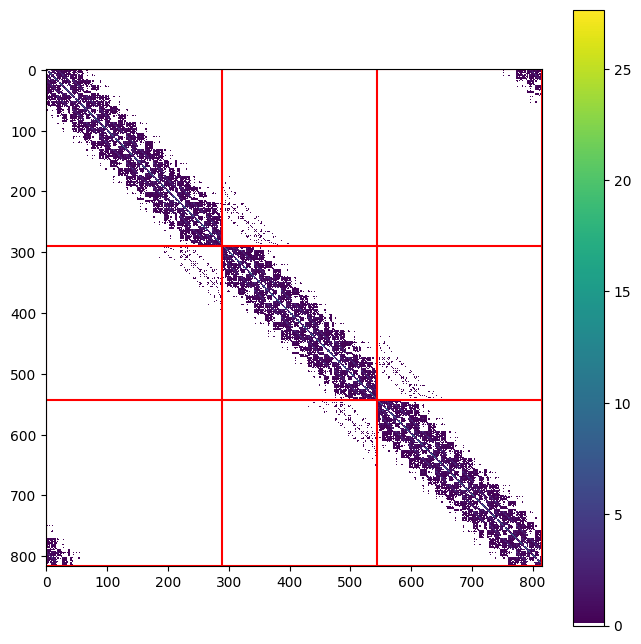

In [ ]:
"""
Visualizes the absolute values of the subdiagonalized Hamiltonian matrix with block structure boundaries.

This script performs the following steps:

Loads the node partitioning indices and the subdiagonalized Hamiltonian from the specified data folder.
   - `nodes.npy` contains the block boundary indices. Example: [0, 290, 544, 816]
   - `hs_los_lowdin.npy` contains the lowdin-orthogonalized Hamiltonian data.

Plots the absolute values of `H_subdiagonalized` using `imshow` with the custom colormap.

Overlays red horizontal and vertical lines at each node boundary to highlight the block structure of the matrix.
   - The lines are drawn at `node - 0.5` to align correctly with pixel edges in `imshow`.


This visualization helps identify the block structure of the Hamiltonian after subdiagonalization, making it easier
to inspect couplings between different subsystems or partitions.

"""


data_folder = "./output/lowdin"
nodes = np.load(f"{data_folder}/nodes.npy")
H_subdiagonalized, _ = np.load(f"{data_folder}/hs_los_lowdin.npy")
H_subdiagonalized = H_subdiagonalized[0]
cmap = cm.get_cmap('viridis', 256)
new_colors = cmap(np.linspace(0, 1, 256))
new_colors[0] = [1, 1, 1, 1]
new_cmap = ListedColormap(new_colors)


plt.figure(figsize=(8, 8))
plt.imshow(np.abs(H_subdiagonalized), cmap=new_cmap)
plt.colorbar()


for node in nodes:
    plt.axhline(node - 0.5, color='red', linewidth=1.5)
    plt.axvline(node - 0.5, color='red', linewidth=1.5)

plt.show()
